# Adenosine deaminase kinetic assay 

For methods see https://gist.github.com/dacarlin/d1710d0e2520f6ca0590

## Enzyme concentration titration

### Experimental conditions

**Assay buffer**: 50 mM sodium phosphate, 300 mM sodium chloride, 2 mg/mL BSA, 1 mM zinc sulfate, 1 mM TCEP, 10 mM imidazole. 

Absorbance at 265 was measured every minute for 60 minutes. 

### Results 

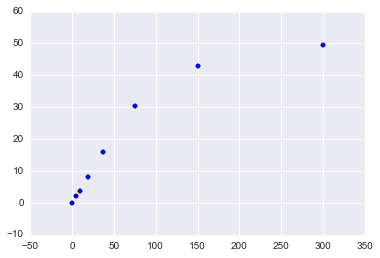

In [25]:
import pandas 
import matplotlib.pyplot as plt 
%matplotlib inline

df = pandas.read_csv( 'titration_column_3.csv' )

smap = { # in-well substrate concentrations in micromolar 
    'A': 300, 
    'B': 150, 
    'C': 75, 
    'D': 37.5, 
    'E': 18.75, 
    'F': 9.375, 
    'G': 4.6875,
    'H': 0, 
}

df['s'] = df.well.str[0].map( smap )
df['posmaxv'] = - df.maxv
plt.scatter( df.s, df.posmaxv )
standard_curve = pandas.read_csv( 'standard_curve_edited.csv' )

In [11]:
df.columns

Index([u'well', u'maxv', u's', u'posmaxv'], dtype='object')

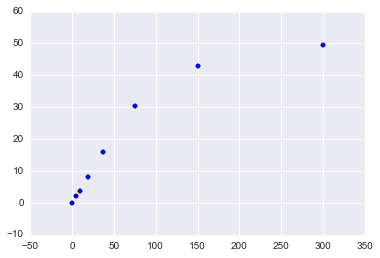

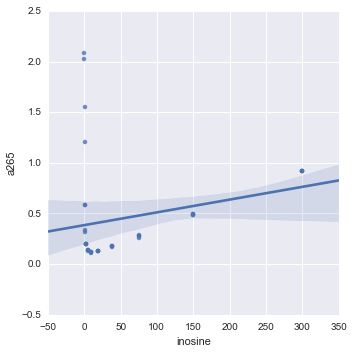

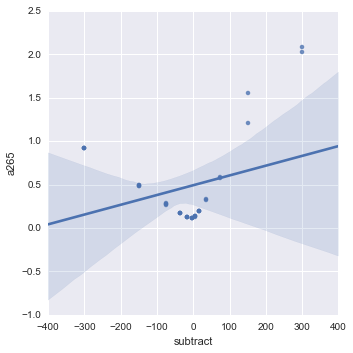

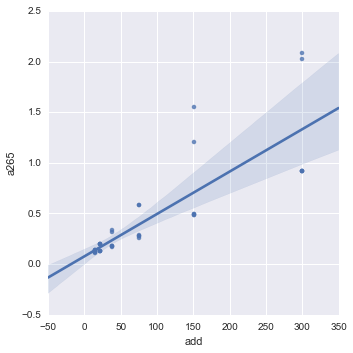

In [13]:
standard_curve = pandas.read_csv( 'standard_curve_edited.csv' )
seaborn.lmplot( x='adenosine', y='a265', data=standard_curve )
seaborn.lmplot( x='inosine', y='a265', data=standard_curve )

standard_curve[ 'ratio' ] = standard_curve.inosine / standard_curve.adenosine
standard_curve[ 'subtract' ] = standard_curve.adenosine - standard_curve.inosine 
standard_curve[ 'add' ] = standard_curve.adenosine + standard_curve.inosine 

seaborn.lmplot( x='ratio', y='a265', data=standard_curve )
seaborn.lmplot( x='subtract', y='a265', data=standard_curve )
seaborn.lmplot( x='add', y='a265', data=standard_curve )
seaborn.lmplot( x='a265', y='adenosine', data=standard_curve )

In [24]:
from scipy.optimize import curve_fit

trip = pandas.read_csv( 'triplicate_1000x_dilution.csv' )
trip['s'] = trip.well.str[0].map( smap )
trip['posmaxv'] = - trip.maxv

def v( s, kcat, km ): return ( kcat * s ) / ( km + s )
popt, pcov = curve_fit( v, trip.s, trip.posmaxv, p0=(50,50) )

x = range( 350 ) 
y = [ v( i, popt[0], popt[1] ) for i in x ]

plt.scatter( x=x, y=y, marker=".", color='g', alpha=0.1 )
plt.scatter( x=trip.s, y=trip.posmaxv )
plt.xlabel( 'Adenosine (uM)' )
plt.ylabel( 'Rate observed (mOD/min)' )

print 'kcat: {:0.0f} mOD/min'.format( popt[0] )
print 'km: {:0.0f} µM'.format( popt[1] )

kcat: 78 mOD/min
km: 174 µM
